In a maybe sporadic series of blog posts, I will be creating visualizations -- first in R and then in D3 -- from a single dataset. The dataset which I have chosen is the [Adult](http://archive.ics.uci.edu/ml/datasets/Adult) (otherwise known as "Census Income") dataset from the UCI Machine Learning Repository. This dataset has 32561 rows and 14 columns.


# Data wrangling
Like always, the first thing to do is to convert the data to a workable format. 

## Remove whitespace from CSV
In the raw `adult.data` file, the CSV contains extra whitespace which will need to be stripped out. From a search on [stackoverflow](http://stackoverflow.com/questions/13385860/how-can-i-remove-extra-whitespace-from-strings-when-parsing-a-csv-file-in-pandas), we can modify the code to suit our needs.

In [1]:
import pandas as pd

In [2]:
datfile = 'dat/adult.data'

def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text
    
def make_int(text):
    return int(text.strip('" '))

df = pd.read_csv(datfile,
                 names=['age', 'workclass', 'fnlwgt', 
                        'education', 'educationnum', 
                        'maritalstatus', 'occupation', 
                        'relationship', 'race', 'sex', 
                        'capitalgain', 'capitalloss', 
                        'hoursperweek', 'nativecountry', 
                        'income'],
                converters = {'age':make_int, 
                              'workclass':strip, 
                              'fnlwgt':make_int, 
                              'education':strip, 
                              'educationnum':make_int, 
                              'maritalstatus':strip, 
                              'occupation':strip, 
                              'relationship':strip, 
                              'race':strip, 
                              'sex':strip, 
                              'capitalgain':make_int,
                              'capitalloss':make_int, 
                              'hoursperweek':make_int, 
                              'nativecountry':strip, 
                              'income':strip})

# df.to_csv('adult.data.tsv', sep='\t', index=False)
df.ix[0:4,]

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data visualization
## In R:
For this visualization, I will be creating a stacked bar chart made by calling R from iPython notebook.

In [3]:
%load_ext rpy2.ipython

The R package which I usually default to for plotting is `ggplot2`.

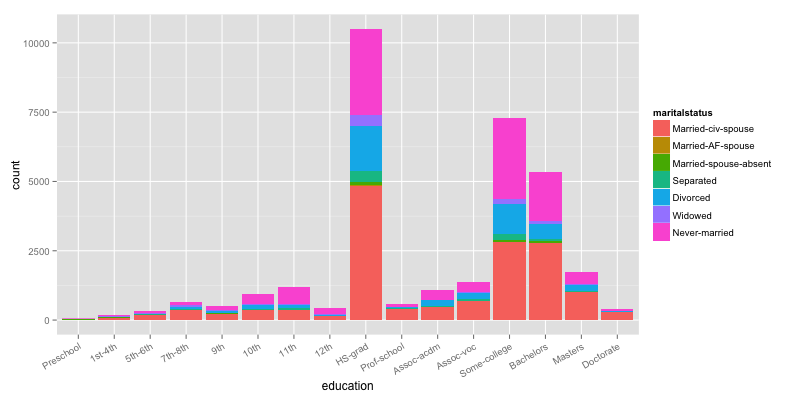

In [4]:
%%R -i df  -w 800 -h 400

library(ggplot2)

## REORDER FACTOR TO SOME LOGICAL ORDER
df$education <- factor(df$education, 
       levels=c('Preschool', '1st-4th', '5th-6th', '7th-8th', 
                '9th', '10th', '11th', '12th', 'HS-grad', 
                'Prof-school', 'Assoc-acdm', 'Assoc-voc',
                'Some-college', 'Bachelors', 'Masters', 'Doctorate'))

df$maritalstatus <- factor(df$maritalstatus, 
       levels=c("Married-civ-spouse", "Married-AF-spouse", 
                "Married-spouse-absent", "Separated",
                "Divorced", "Widowed", "Never-married"))

## PLOT
ggplot(df, aes(x=education)) +
    geom_bar(aes(fill=maritalstatus)) + 
    theme(axis.text.x = element_text(angle = 30, hjust = 1))

## In D3:
Let's start with putting the **data** in JavaScript friendly format.

In [5]:
import sys

## HELPER
def failsafecount(k, d):
    if k in d.index:
        return d[k]
    else:
        return 0

## SET ORDER IN LEVEL OF EDUCATION
educationorder = ['Preschool', '1st-4th', '5th-6th', '7th-8th', 
                  '9th', '10th', '11th', '12th', 'HS-grad', 
                  'Prof-school', 'Assoc-acdm', 'Assoc-voc',
                  'Some-college', 'Bachelors', 'Masters', 'Doctorate']

maritalstatusorder = ["Married-civ-spouse", "Married-AF-spouse", 
                      "Married-spouse-absent", "Separated",
                      "Divorced", "Widowed", "Never-married"]

## SETUP VARIABLES TO BE USED IN FOR-LOOP
dftmp = df.groupby(['education', 'maritalstatus']).size()

out = sys.stdout ## toggle to print to file or standard out

## TO JS format
out.write('var data = [\n')
for education in educationorder:
    out.write('{"key":"%s"' % education)
    for i in maritalstatusorder:
        out.write(',"%s":%s' % (i, failsafecount(i, dftmp[education])))
    out.write('},\n')
out.write('];\n')

## REMOVE UNEEDED VARIABLE
del dftmp

var data = [
{"key":"Preschool","Married-civ-spouse":20,"Married-AF-spouse":0,"Married-spouse-absent":4,"Separated":1,"Divorced":1,"Widowed":3,"Never-married":22},
{"key":"1st-4th","Married-civ-spouse":81,"Married-AF-spouse":0,"Married-spouse-absent":12,"Separated":9,"Divorced":10,"Widowed":17,"Never-married":39},
{"key":"5th-6th","Married-civ-spouse":172,"Married-AF-spouse":0,"Married-spouse-absent":20,"Separated":18,"Divorced":20,"Widowed":14,"Never-married":89},
{"key":"7th-8th","Married-civ-spouse":359,"Married-AF-spouse":0,"Married-spouse-absent":14,"Separated":23,"Divorced":73,"Widowed":64,"Never-married":113},
{"key":"9th","Married-civ-spouse":230,"Married-AF-spouse":0,"Married-spouse-absent":9,"Separated":33,"Divorced":64,"Widowed":23,"Never-married":155},
{"key":"10th","Married-civ-spouse":349,"Married-AF-spouse":0,"Married-spouse-absent":15,"Separated":49,"Divorced":120,"Widowed":39,"Never-married":361},
{"key":"11th","Married-civ-spouse":354,"Married-AF-spouse":0,"Married-sp

### General specifications
Here we add in the figure **size** information. We also included a variable for `margin` to allow us to adjust, if necessary, the space for the x- and y-axis.

```
var margin = {top: 15, right: 55, bottom: 50, left: 50},
    width = 666 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;
```

We then specify particular **colors** (reference: [stackoverflow](http://stackoverflow.com/questions/8197559/emulate-ggplot2-default-color-palette)) to emulate those in the ggplot figure.

In [6]:
%%R 
## REFERENCE: 
## http://stackoverflow.com/questions/8197559/emulate-ggplot2-default-color-palette
gg_color_hue <- function(n) {
  hues = seq(15, 375, length=n+1)
  hcl(h=hues, l=65, c=100)[1:n]
}
gg_color_hue(7)

[1] "#F8766D" "#C49A00" "#53B400" "#00C094" "#00B6EB" "#A58AFF" "#FB61D7"


```
var color = d3.scale.category10()
    .domain(d3.keys(data[0]).slice(1))
    .range(["#F8766D", "#C49A00", "#53B400", "#00C094", "#00B6EB", "#A58AFF", "#FB61D7"]);

/** NOTE:
> d3.keys(data[0]).slice(1)
[ '<=50K', '>50K' ]
**/
```

After color specification and before we can render each stacked bar in the overall plot, we need 2 additional pieces of information: the total length of each bar and the height of each composite piece. Here we proceed to obtain this information by do doing some **calculations** on the data of each bar.

```
data.forEach(function(d) {
    var y0 = 0;
    d.pieces = color.domain().map(function(name) { return {name: name, y0: y0, y1: y0 += +d[name]}; });
    d.total = d.pieces[d.pieces.length - 1].y1;
});

/** NOTE: "data" BEFORE AND AFTER:
> data[0]
{ key: 'Preschool',
  '<=50K': 51,
  '>50K': 0 }
    
> data[0]
{ key: 'Preschool',
  '<=50K': 51,
  '>50K': 0,
  pieces:
   [ { name: '<=50K', y0: 0, y1: 51 },
     { name: '>50K', y0: 51, y1: 51 } ],
  total: 51 }
**/
```

Afterwards, we then can add in the **x- and y-scaling** of the ordinal data.

```
var x = d3.scale.ordinal()
    .domain(data.map(function(d){return d['key'];}))
    .rangeRoundBands([0, width], .1);
    
/** NOTE:
> data.map(function(d){return d['key'];})
[ 'Preschool',
  '1st-4th',
  '5th-6th',
  ...
**/


var y = d3.scale.linear()
    .domain([0, d3.max(data.map(function(d){return d.total;}))])
    .rangeRound([height, 0]);
    
/** NOTE: WILL RETURN THE MAX OF ALL data[*].total
> d3.max(data.map(function(d){return d.total;}))
10501
**/
```

### Feature specifications
With what I call the general specification setup done, we then specify the extra stuff (e.g. the **x- and y- axes** plus **tooltip**).
```
var xAxis = d3.svg.axis() 
    .scale(x)
    .orient("bottom");

var yAxis = d3.svg.axis() 
    .scale(y)
    .orient("left");


var tooltip = d3.select("body")
  .append("div")
    .attr("class", "infobox")
    .style("position", "absolute")
    .style("z-index", "10")
    .style("visibility", "hidden");

```

### Specifying the chart
With all the necessary variables setup, we can now specify the size and location of the **chart**. When specifying the chart's `width` and `height`, we need to consider everything (i.e including the margins). When we add in the series of stacked bars, we need to make space for the margins.
```
var chart = d3.select('.chart').append('svg')
	.attr('width', width + margin.left + margin.right)
	.attr('height', height + margin.top + margin.bottom)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");
```

#### The bars + tooltip
To the chart, we can now add in [`g` elements](https://developer.mozilla.org/en/docs/Web/SVG/Element/g) to do sub-groupings for each bar.

```
var bar = chart.selectAll("g")
    .data(data)
  .enter().append("g")
    .attr("transform", function(d, i) { return "translate(" + x(d['key']) + ",0)"; });
    
/** NOTE: 
"translate(<x>,0)" will be used to specify the x location of the bars
**/
```

Here we add in our bars with their composite pieces. The `.on("mouse...` parts of the code makes the graph dynamic (i.e. when we have the mouse on top of each piece, the color will fade and an information box will pop up). 

```
bar.selectAll("rect")
    .data(function(d) { return d.pieces; })
  .enter().append("rect")
    .attr("y", function(d){return y(d.y1); })
    .attr("height", function(d) { return y(d.y0) - y(d.y1); })
    .attr("width", x.rangeBand())
    .style("fill", function(d){ return color(d.name); })
    .on("mouseover", function(d){
        d3.select(this)
            .style({opacity:'0.7'});
        tooltip
            .style("visibility", "visible")
            .html("<b>" + d.name + "</b><br/>Count: " +  (d.y1 - d.y0) + "<br>Proportion: "
                + d3.format("%")((d.y1 - d.y0) / d3.select(this.parentNode).datum().total));
    })
    .on("mousemove", function(){
        tooltip
            .style("top", (d3.event.pageY-10)+"px")
            .style("left",(d3.event.pageX+10)+"px");
    })
    .on("mouseout", function(d){
        d3.select(this)
            .style({opacity:'1'});
        tooltip
            .style("visibility", "hidden");
    });
```

To make the tooltip pretty, we use some CSS.
```
<style>
.infobox {
        position: absolute;
        padding: 10px;
        background-color: rgba(0,0,0,.2);
}
</style>
```

- References:
  - \[Tooltip\] Pwdr's answer to [D3 show data on mouseover of circle](http://stackoverflow.com/questions/10805184/d3-show-data-on-mouseover-of-circle)_
  - \[CSS of infobox\]: sfrdmn's example of [D3 Mouseover Example w/ trailing infobox](http://bl.ocks.org/sfrdmn/1437516)

#### The axes
To the chart, we now add in the **x-axis**. We have specified the axes after specifying the bars so that the `g` elements containing the axes infomation is on the same level as that of the bars (instead of subsuming the bars). 
```
chart.append("g")
    .attr("class", "x axis")
    .attr("transform", "translate(0," + height + ")")
    .call(xAxis)
  .selectAll("text")  //ROTATE X-AXIS TICK LABELS
    .style("text-anchor", "end")
    .attr("dx", "1em")
    .attr("dy", "1em")
    .attr("transform", function(d){return "rotate(-30)"});

chart.append("text")  //X-LABEL
    .attr("class", "x label")
    .style("text-anchor", "start")
    .attr("x", width - 3)
    .attr("y", height)
    .text("Education");
```

Here we add the **y-axis** and its y-label.
```
chart.append("g")
    .attr("class", "y axis")
    .attr("transform", "translate(0,0)")
    .call(yAxis)
  .append("text")
    .attr("class", "y label")
    .style("text-anchor", "end")
    .attr("dy", "-.3em")
    .text("Count");
```

To make the axes all pretty, we use more CSS.
```
<style>
body {
    font: 12px sans-serif;
}
.axis path, .axis line {
    fill: none;
    stroke: #000;
    shape-rendering: crispEdges;
}
.x.axis path {
    display: none;
}
text.label {
    fill: #A9A9A9;
    font-weight: bold;
}
</style>
```

#### The legend
In the final part, we add in a legend to the chart.
```
//LEGEND TITLE
chart.append("text")
    .attr("class", "label")
    .style("text-anchor", "start")
    .attr("x", x.rangeBand()/2)
    .attr("dy", "-0.3em")
    .text("Marital Status");

//LEGEND
var legend = chart.selectAll(".legend")
    .data(color.domain().reverse())
  .enter().append("g")
    .attr("class", "legend")
    .attr("transform", function(d, i) { return "translate(0," + i * 20 + ")"; });

legend.append("rect")
    .attr("x", x.rangeBand()/2)
    .attr("width", 18)
    .attr("height", 18)
    .style("fill", color);

legend.append("text")
    .attr("x", x.rangeBand()/2 + 24)
    .attr("y", 9)
    .attr("dy", ".35em")
    .style("text-anchor", "start")
    .text(function(d){return d;});
```

### Result
When we put it all together, we should get something like this:

In [7]:
from IPython.display import IFrame
IFrame('http://bl.ocks.org/csiu/raw/3b8a907db0a7d7e16d5e/f2c7b5a0097e017450fe0c8d8ac7110682ad5c8a/',1000,450)

You can also view the completed D3 code here: http://bl.ocks.org/csiu/3b8a907db0a7d7e16d5e

# Concluding thoughts
It way easier to generating this figure in R, however the dynamic potential of D3 allows for more information to be embedded. All in all, it was an excellent learning experience trying to get something -- simple in R -- to work in D3.